Лабораторна робота №1

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')
sepal_length = np.array(iris['sepal_length'])
sepal_width = np.array(iris['sepal_width'])
petal_width = np.array(iris['petal_width'])

In [3]:
def findZScore(column):
    meanOfData = np.mean(column)
    dataMinusMean = np.subtract(column, meanOfData)
    squaredDiff = np.square(dataMinusMean)
    meanSqureDiff = np.sqrt(np.mean(squaredDiff))

    zScores = []
    for i in range(len(column)):
        z_score = np.abs((column[i] - meanOfData) / meanSqureDiff)
        zScores.append(z_score)

    return np.array(zScores)
    

In [4]:

scores1 = findZScore(sepal_length)
scores2 = findZScore(sepal_width)
scores3 = findZScore(petal_width)

In [5]:
def filterZscores(scores1, scores2, scores3, column1, column2, column3):
    outliers1, outliers2, outliers3 = [], [], []
    hashmap = {}

    for i in range(len(column1)):
        meanScore = np.mean([scores1[i], scores2[i], scores3[i]])
        hashmap[i] = meanScore

        if meanScore > 3:
            outliers1.append(column1[i])
            outliers2.append(column2[i])
            outliers3.append(column3[i])

    if (len(outliers1) < 5 ):
        cnt = 0
        sorted_hashmap = dict(sorted(hashmap.items(), key=lambda item: item[1], reverse=True))

        for j in sorted_hashmap:
            if cnt >= 10: break
            outliers1.append(column1[j])
            outliers2.append(column2[j])
            outliers3.append(column3[j])
            cnt += 1

    return (outliers1, outliers2, outliers3)
        

In [6]:
outliers1, outliers2, outliers3 = filterZscores(scores1, scores2, scores3, sepal_length, sepal_width, petal_width)

print(outliers1)
print(outliers2)
print(outliers3)

[7.7, 7.9, 7.7, 5.2, 7.2, 4.5, 5.5, 5.7, 4.6, 5.1]
[3.8, 3.8, 2.6, 4.1, 3.6, 2.3, 4.2, 4.4, 3.6, 3.8]
[2.2, 2.0, 2.3, 0.1, 2.5, 0.3, 0.2, 0.4, 0.2, 0.2]


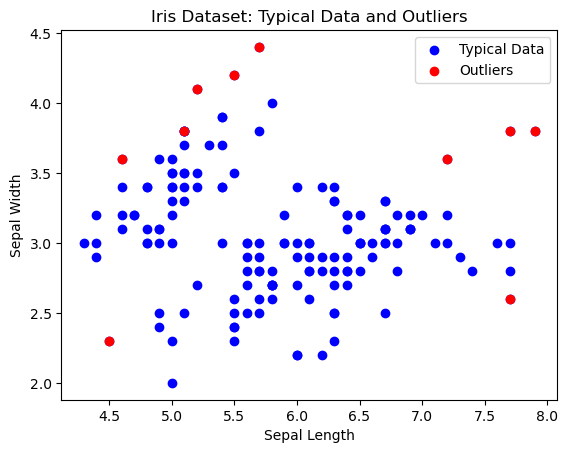

In [7]:
plt.scatter(sepal_length, sepal_width, color='blue', label='Typical Data')
plt.scatter(outliers1, outliers2, color='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Typical Data and Outliers')
plt.legend()

plt.show()

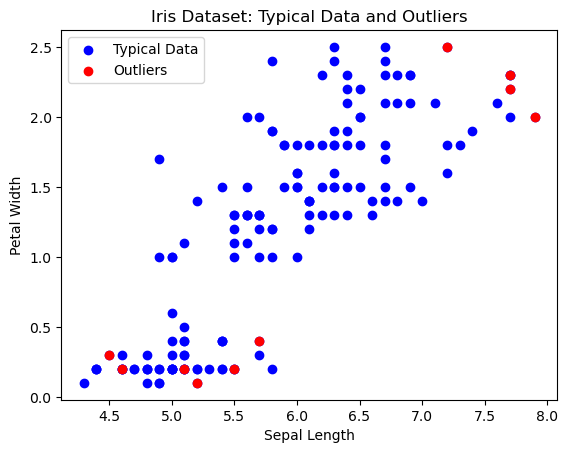

In [8]:
plt.scatter(sepal_length, petal_width, color='blue', label='Typical Data')
plt.scatter(outliers1, outliers3, color='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset: Typical Data and Outliers')
plt.legend()

plt.show()

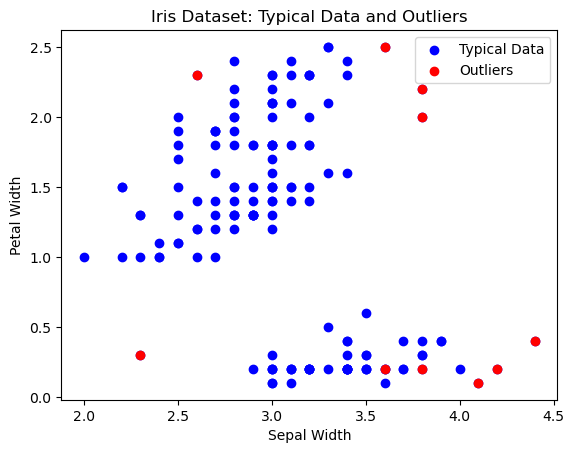

In [9]:
plt.scatter(sepal_width, petal_width, color='blue', label='Typical Data')
plt.scatter(outliers2, outliers3, color='red', label='Outliers')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Iris Dataset: Typical Data and Outliers')
plt.legend()

plt.show()